In [78]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
sample_submission = pd.read_csv("../input/house-prices-advanced-regression-techniques/sample_submission.csv")
test = pd.read_csv("../input/house-prices-advanced-regression-techniques/test.csv")
train = pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")

In [80]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [81]:
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [82]:
train.dropna()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


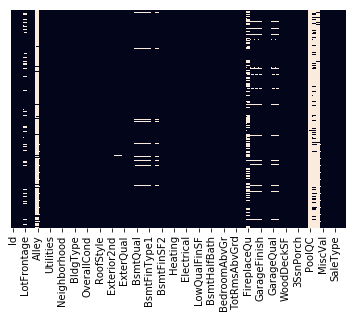

In [83]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

In [84]:
train.shape

(1460, 81)

In [85]:
train['LotFrontage']=train['LotFrontage'].fillna(train['LotFrontage'].mean()) 

In [86]:
train.drop(['Alley'],axis=1,inplace=True)

In [87]:
train['BsmtCond']=train['BsmtCond'].fillna(train['BsmtCond'].mode()[0])


In [88]:
train['FireplaceQu']=train['FireplaceQu'].fillna(train['FireplaceQu'].mode()[0])
train['GarageType']=train['GarageType'].fillna(train['GarageType'].mode()[0])

In [89]:
train.drop(['GarageYrBlt'],axis=1,inplace=True)

In [90]:
train['GarageCond']=train['GarageCond'].fillna(train['GarageCond'].mode()[0])
train['GarageFinish']=train['GarageFinish'].fillna(train['GarageFinish'].mode()[0])
train['GarageQual']=train['GarageQual'].fillna(train['GarageQual'].mode()[0])


In [91]:
train.drop(['PoolQC','Fence','MiscFeature',],axis=1,inplace=True)

In [92]:
train.shape

(1460, 76)

In [93]:
train.drop(['Id'],axis=1,inplace=True)

In [94]:
train.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 75, dtype: int64

In [95]:
train['MasVnrType']=train['MasVnrType'].fillna(train['MasVnrType'].mode()[0])
train['MasVnrArea']=train['MasVnrArea'].fillna(train['MasVnrArea'].mode()[0])

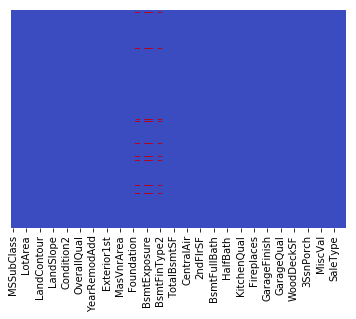

In [96]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [97]:
train['BsmtExposure']=train['BsmtExposure'].fillna(train['BsmtExposure'].mode()[0])


In [98]:
train.drop(['BsmtQual'],axis=1,inplace=True)

In [99]:
train['Foundation']=train['Foundation'].fillna(train['Foundation'].mode()[0])
train['BsmtFinType2']=train['BsmtFinType2'].fillna(train['BsmtFinType2'].mode()[0])

In [100]:
train.dropna(inplace=True)

In [101]:
train.shape

(1422, 74)

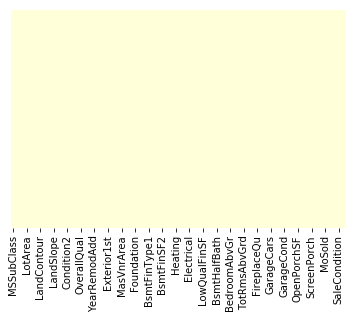

In [102]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

In [103]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [104]:
columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition2','BldgType','Condition1','HouseStyle'
         ,'SaleType','SaleCondition','ExterCond','ExterQual','Foundation','BsmtCond','BsmtExposure','BsmtFinType1',
          'BsmtFinType2','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC','CentralAir','Electrical',
         'KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']


In [105]:
len(columns)

38

In [106]:
def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
        
    df_final=pd.concat([final_df,df_final],axis=1)
    
    return df_final

In [107]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [108]:
test.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

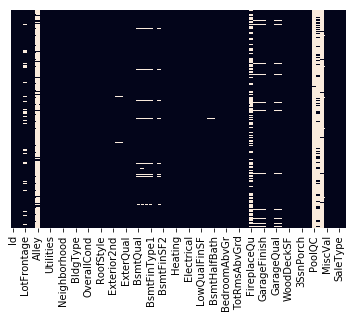

In [109]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False)

In [110]:
test.shape

(1459, 80)

In [111]:
test['LotFrontage']=test['LotFrontage'].fillna(test['LotFrontage'].mean()) 

In [112]:
test.drop(['Alley'],axis=1,inplace=True)

In [113]:
test['BsmtCond']=test['BsmtCond'].fillna(test['BsmtCond'].mode()[0])


In [114]:
test.drop(['BsmtQual'],axis=1,inplace=True)

In [115]:
test.shape

(1459, 78)

In [116]:
test['FireplaceQu']=test['FireplaceQu'].fillna(test['FireplaceQu'].mode()[0])
test['GarageType']=test['GarageType'].fillna(test['GarageType'].mode()[0])

In [117]:
test.drop(['GarageYrBlt'],axis=1,inplace=True)

In [118]:
test['GarageCond']=test['GarageCond'].fillna(test['GarageCond'].mode()[0])
test['GarageFinish']=test['GarageFinish'].fillna(test['GarageFinish'].mode()[0])
test['GarageQual']=test['GarageQual'].fillna(test['GarageQual'].mode()[0])

In [119]:
test.drop(['PoolQC','Fence','MiscFeature',],axis=1,inplace=True)

In [120]:
test.shape

(1459, 74)

In [121]:
test.drop(['Id'],axis=1,inplace=True)

In [122]:
test.isnull().sum()

MSSubClass       0
MSZoning         4
LotFrontage      0
LotArea          0
Street           0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         1
SaleCondition    0
Length: 73, dtype: int64

In [123]:
test['MasVnrType']=test['MasVnrType'].fillna(test['MasVnrType'].mode()[0])
test['MasVnrArea']=test['MasVnrArea'].fillna(test['MasVnrArea'].mode()[0])

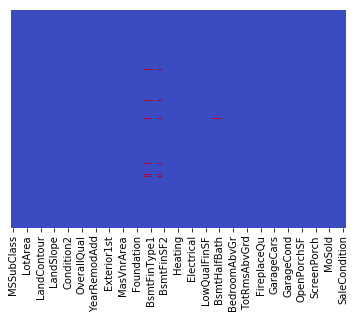

In [124]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [125]:
test['BsmtExposure']=test['BsmtExposure'].fillna(test['BsmtExposure'].mode()[0])

In [126]:
test['Foundation']=test['Foundation'].fillna(test['Foundation'].mode()[0])
test['BsmtFinType2']=test['BsmtFinType2'].fillna(test['BsmtFinType2'].mode()[0])

In [127]:
test.dropna(inplace=True)

In [128]:
test.shape

(1410, 73)

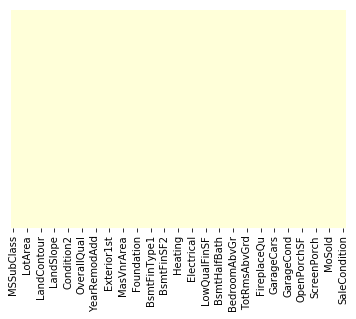

In [129]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

In [130]:
test['BsmtFinType2']=test['BsmtFinType2'].fillna(test['BsmtFinType2'].mode()[0])

In [131]:
test.loc[:,test.isnull().any()].head()

""
0
1
2
3
4


In [132]:
test['Utilities']=test['Utilities'].fillna(test['Utilities'].mode()[0])
test['Exterior1st']=test['Exterior1st'].fillna(test['Exterior1st'].mode()[0])
test['Exterior2nd']=test['Exterior2nd'].fillna(test['Exterior2nd'].mode()[0])
test['BsmtFinType1']=test['BsmtFinType1'].fillna(test['BsmtFinType1'].mode()[0])
test['BsmtFinSF1']=test['BsmtFinSF1'].fillna(test['BsmtFinSF1'].mean())
test['BsmtFinSF2']=test['BsmtFinSF2'].fillna(test['BsmtFinSF2'].mean())
test['BsmtUnfSF']=test['BsmtUnfSF'].fillna(test['BsmtUnfSF'].mean())
test['TotalBsmtSF']=test['TotalBsmtSF'].fillna(test['TotalBsmtSF'].mean())
test['BsmtFullBath']=test['BsmtFullBath'].fillna(test['BsmtFullBath'].mode()[0])
test['BsmtHalfBath']=test['BsmtHalfBath'].fillna(test['BsmtHalfBath'].mode()[0])
test['KitchenQual']=test['KitchenQual'].fillna(test['KitchenQual'].mode()[0])
test['Functional']=test['Functional'].fillna(test['Functional'].mode()[0])
test['GarageCars']=test['GarageCars'].fillna(test['GarageCars'].mean())
test['GarageArea']=test['GarageArea'].fillna(test['GarageArea'].mean())
test['SaleType']=test['SaleType'].fillna(test['SaleType'].mode()[0])


In [133]:
test.to_csv('formulatedtest.csv',index=False)

In [134]:
main_df=train.copy()

In [135]:
test=pd.read_csv('formulatedtest.csv')

In [136]:
test.shape

(1410, 73)

In [137]:
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal


In [138]:
final_df=pd.concat([train,test],axis=0)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [139]:
final_df.shape

(2832, 74)

In [140]:
final_df=category_onehot_multcols(columns)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition2
BldgType
Condition1
HouseStyle
SaleType
SaleCondition
ExterCond
ExterQual
Foundation
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive


In [141]:
final_df.shape

(2832, 230)

In [142]:
final_df =final_df.loc[:,~final_df.columns.duplicated()]

In [143]:
final_df.shape

(2832, 173)

In [144]:
df_Train=final_df.iloc[:1422,:]
df_Test=final_df.iloc[1422:,:]

In [145]:
df_Test.drop(['SalePrice'],axis=1,inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [146]:
df_Test.shape

(1410, 172)

In [147]:
X_train=df_Train.drop(['SalePrice'],axis=1)
Y_train=df_Train['SalePrice']

In [148]:
import xgboost
classifier=xgboost.XGBRegressor()
classifier.fit(X_train,Y_train)

[06:38:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [149]:
import pickle
filename = 'finalized_model.pkl'
pickle.dump(classifier,open(filename,'wb'))

In [150]:
y_pred=classifier.predict(df_Test)

In [151]:
y_pred

array([120400.42, 158911.88, 180999.78, ..., 173712.56, 122531.15,
       242785.78], dtype=float32)

In [152]:
pred=pd.DataFrame(y_pred)
sub_df=pd.read_csv("../input/house-prices-advanced-regression-techniques/sample_submission.csv")
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('sample_submission.csv',index=False)